<a href="https://colab.research.google.com/github/georgynio/notebooks-ML/blob/main/Otimiza%C3%A7%C3%A3o_atraves_de_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install graphviz
# !pip install pydot

# !apt install graphviz

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
dados_azar = dados.sort_values('vendido', ascending=True)
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']
dados_azar.head()


,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


#Linha de base com validação cruzada

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'Accuracy com dummy stratified, 10 = [{(media-2*desvio_padrao)*100:.2f}, {(media+2*desvio_padrao)*100:.2f}]')

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'Accuracy com dummy stratified, 10 = [{(media-2*desvio_padrao)*100:.2f}, {(media+2*desvio_padrao)*100:.2f}]')

Accuracy com dummy stratified, 10 = [73.83, 77.73]


# Agrupando os carros por modelos

In [6]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f'Accuracy médio: {media*100:.2f}')
    print(f'Accuracy com dummy stratified, 10 = [{(media-2*desvio_padrao)*100:.2f}, {(media+2*desvio_padrao)*100:.2f}]')

In [8]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio: 75.78
Accuracy com dummy stratified, 10 = [73.67, 77.90]


In [9]:
from multiprocessing import Pipe
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(301)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 76.68
Accuracy com dummy stratified, 10 = [74.28, 79.08]


#Agora vamos utilizar o modelo `DecisionTreeClassifier` como modelo para trabalhar



In [10]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio: 75.78
Accuracy com dummy stratified, 10 = [73.67, 77.90]


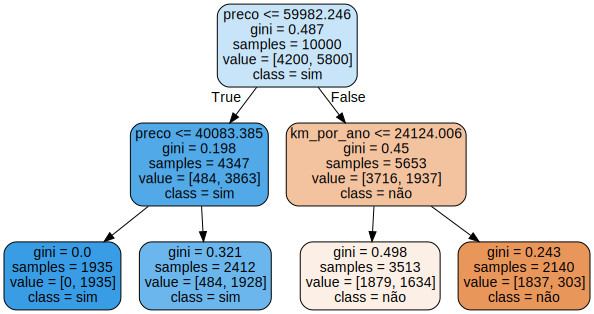

In [11]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

# verificando o que acontece com profundidade maior

In [12]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio: 78.67
Accuracy com dummy stratified, 10 = [76.40, 80.94]


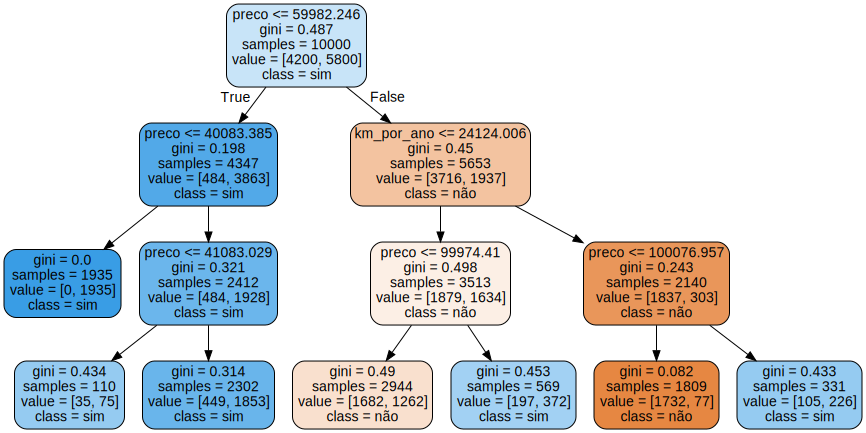

In [13]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

- Note que não necessariamente melhora quando a profundidade aumenta.

In [14]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio: 77.19
Accuracy com dummy stratified, 10 = [75.26, 79.13]


#Testando parametros
* Cuidado, não é correto tomar decisões com poucas regras (profundidade).
* Com o aumento da profundidade, o modelo se ajusta perfeitamente aos dados de treinamento, mas se torna inadequado para dados externos.

In [15]:
def roda_arvore_de_decisao(max_depth):
    from sklearn.model_selection import GroupKFold

    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
    print(f'Arvore max_depth = {max_depth:d}, media = {results["test_score"].mean()*100:.2f}')

for i in range(1,33):
    roda_arvore_de_decisao(i)

Arvore max_depth = 1, media = 75.78
Arvore max_depth = 2, media = 75.78
Arvore max_depth = 3, media = 78.67
Arvore max_depth = 4, media = 78.63
Arvore max_depth = 5, media = 78.56
Arvore max_depth = 6, media = 78.12
Arvore max_depth = 7, media = 77.96
Arvore max_depth = 8, media = 77.86
Arvore max_depth = 9, media = 77.38
Arvore max_depth = 10, media = 77.19
Arvore max_depth = 11, media = 76.97
Arvore max_depth = 12, media = 76.49
Arvore max_depth = 13, media = 75.81
Arvore max_depth = 14, media = 75.66
Arvore max_depth = 15, media = 75.16
Arvore max_depth = 16, media = 75.11
Arvore max_depth = 17, media = 74.74
Arvore max_depth = 18, media = 74.33
Arvore max_depth = 19, media = 74.34
Arvore max_depth = 20, media = 74.22
Arvore max_depth = 21, media = 73.80
Arvore max_depth = 22, media = 73.81
Arvore max_depth = 23, media = 73.38
Arvore max_depth = 24, media = 73.43
Arvore max_depth = 25, media = 73.14
Arvore max_depth = 26, media = 73.04
Arvore max_depth = 27, media = 72.91
Arvore max

* Agora, vamos verificar o que acontece com os dados de treinamento.

In [16]:
def roda_arvore_de_decisao(max_depth):
    from sklearn.model_selection import GroupKFold

    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    print(f'Arvore max_depth = {max_depth:d}, treino = {results["train_score"].mean()*100:.2f}, teste = {results["test_score"].mean()*100:.2f}')

for i in range(1,33):
    roda_arvore_de_decisao(i)

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

In [17]:
def roda_arvore_de_decisao(max_depth):
    from sklearn.model_selection import GroupKFold

    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    print(f'Arvore max_depth = {max_depth:d}, treino = {results["train_score"].mean()*100:.2f}, teste = {results["test_score"].mean()*100:.2f}')
    tabela = [max_depth, results["train_score"].mean()*100, results["test_score"].mean()*100]
    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'treino', 'teste'])

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

A figura está mostrando um 'overfitting' (sobreajuste). Ficou perfeito para o treino, porém perde muito no teste.

<Axes: xlabel='max_depth', ylabel='treino'>

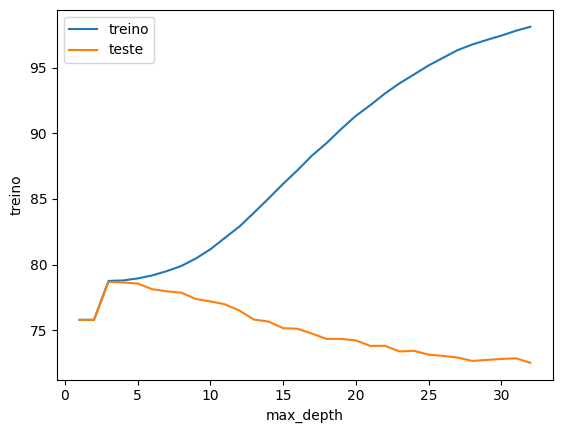

In [18]:
import seaborn as sns
sns.lineplot(data=resultados, x='max_depth', y = 'treino', label='treino', legend=True)
sns.lineplot(data=resultados, x='max_depth', y = 'teste', label='teste')

Podemos utilizar as profundidades 3, 4, 5 ou 6

In [19]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,treino,teste
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Rodar arvore de decisões para 2 hiper parametros

* max_depth
* min_samples_leaf

In [20]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
    from sklearn.model_selection import GroupKFold

    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    print(f'Arvore max_depth = {max_depth:d}, min samples leaf = {min_samples_leaf:.2f}, treino = {results["train_score"].mean()*100:.2f}, teste = {results["test_score"].mean()*100:.2f}')
    tabela = [max_depth, min_samples_leaf, results["train_score"].mean()*100, results["test_score"].mean()*100]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'treino', 'teste'])
    return resultados

resultados = busca()
resultados.head()


Arvore max_depth = 1, min samples leaf = 32.00, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min samples leaf = 64.00, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min samples leaf = 128.00, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min samples leaf = 256.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 32.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 64.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 128.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 256.00, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min samples leaf = 32.00, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min samples leaf = 64.00, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min samples leaf = 128.00, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min samples leaf = 256.00, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min samples leaf = 32.00, treino = 7

,max_depth,min_samples_leaf,treino,teste
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


percebe que o max_depth foi o parametro que mais influenciou

In [21]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,treino,teste
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


Analisamos a correlação para verificar a relação entre os hiperparametros e o treino, teste

In [22]:
corr = resultados.corr()

<Axes: >

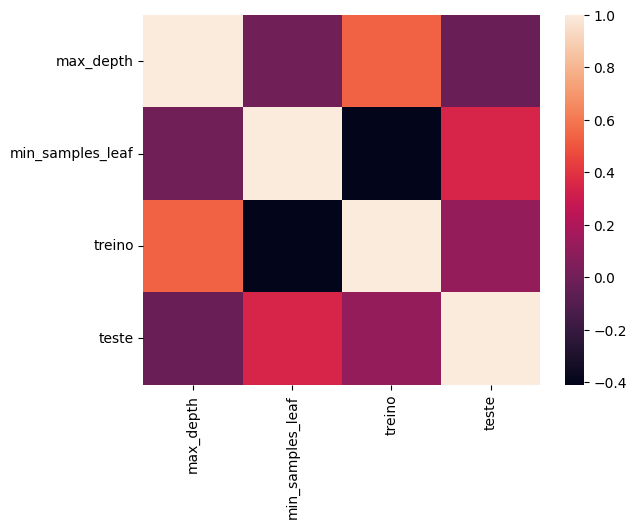

In [23]:
sns.heatmap(corr)

Outras formas de verificar a correlação

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='treino', ylabel='max_depth'>,
        <Axes: xlabel='teste', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='treino', ylabel='min_samples_leaf'>,
        <Axes: xlabel='teste', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='treino'>,
        <Axes: xlabel='min_samples_leaf', ylabel='treino'>,
        <Axes: xlabel='treino', ylabel='treino'>,
        <Axes: xlabel='teste', ylabel='treino'>],
       [<Axes: xlabel='max_depth', ylabel='teste'>,
        <Axes: xlabel='min_samples_leaf', ylabel='teste'>,
        <Axes: xlabel='treino', ylabel='teste'>,
        <Axes: xlabel='teste', ylabel='teste'>]], dtype=object)

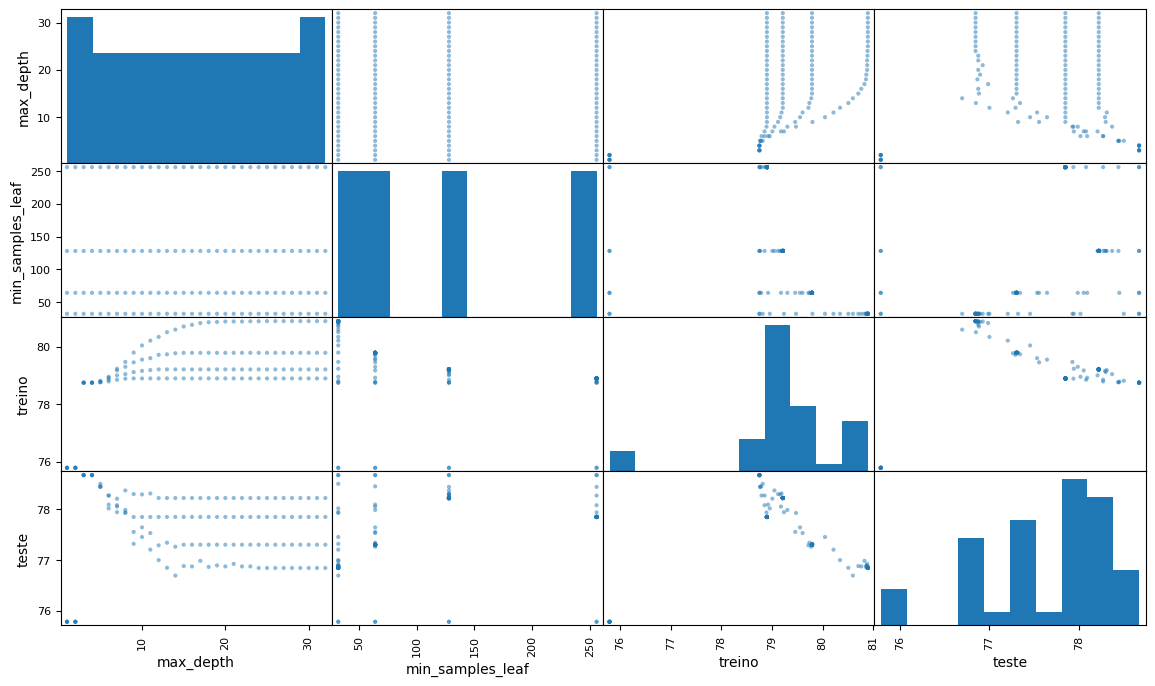

In [24]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8))

Encontramos que:
* Quando aumenta o max_depth o teste cai
* Quando o max_depth aumenta o trieno melhora

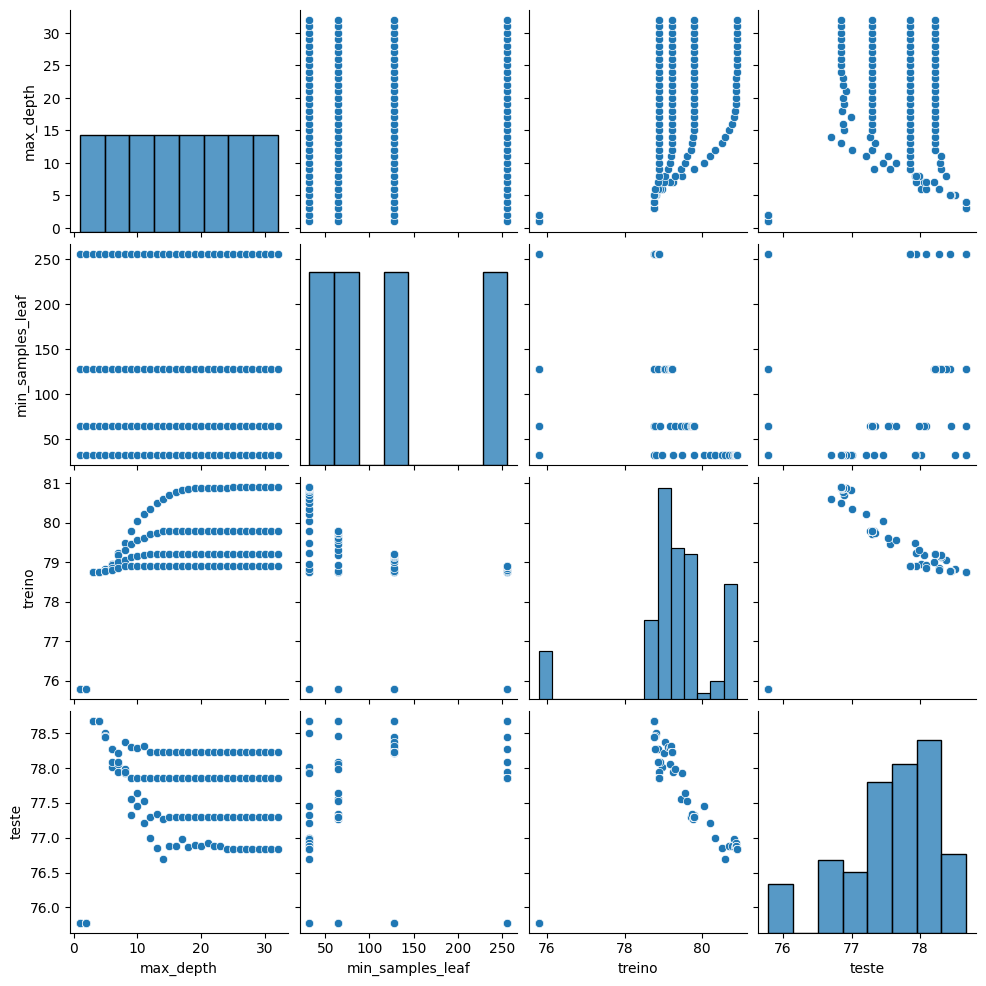

In [25]:
sns.pairplot(resultados)

<Axes: >

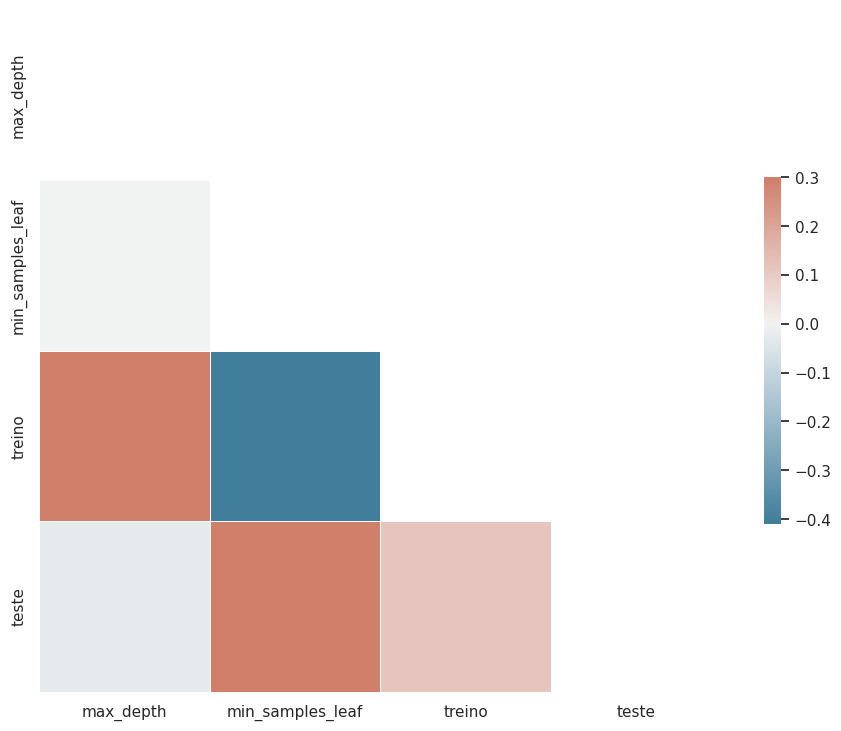

In [26]:
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Dado que os resultados do min_sample_leaf entre 128 e 256 foram melhores, é aconselhável executar
mais casos com valores novos que se encontrem nessa faixa.

In [27]:
def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [128, 192, 256, 512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'treino', 'teste'])
    return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min samples leaf = 128.00, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min samples leaf = 192.00, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min samples leaf = 256.00, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min samples leaf = 512.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 128.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 192.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 256.00, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min samples leaf = 512.00, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min samples leaf = 128.00, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min samples leaf = 192.00, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min samples leaf = 256.00, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min samples leaf = 512.00, treino = 77.53, teste = 77.50
Arvore max_depth = 4, min samples leaf = 128.00, tre

,max_depth,min_samples_leaf,treino,teste
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [28]:
corr = resultados.corr()

<Axes: >

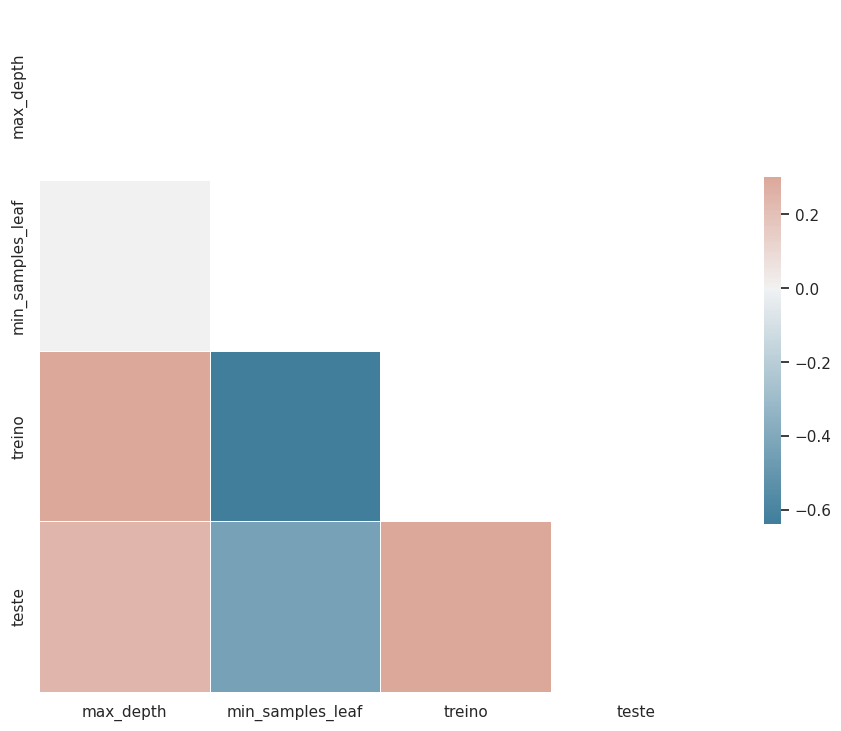

In [29]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,treino,teste
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# Explorando o mínimo de quebras para dar espaço a uma folha

In [31]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    from sklearn.model_selection import GroupKFold

    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    fit_time = results['fit_time'].mean()
    score_time = results['score_time'].mean()
    # print(f'Arvore max_depth = {max_depth:d}, min samples leaf = {min_samples_leaf:.2f}, min samples split = {min_samples_split:.2f}, treino = {results["train_score"].mean()*100:.2f}, teste = {results["test_score"].mean()*100:.2f}')
    tabela = [max_depth, min_samples_leaf, min_samples_split, results["train_score"].mean()*100, results["test_score"].mean()*100, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'min_samples_split', 'treino', 'teste', 'fit_time', 'score_time'])
    return resultados

resultados = busca()
resultados.head()


,max_depth,min_samples_leaf,min_samples_split,treino,teste,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.010705,0.003459
1,1,32,64,75.791169,75.784219,0.009663,0.003724
2,1,32,128,75.791169,75.784219,0.009367,0.003466
3,1,32,256,75.791169,75.784219,0.010180,0.003370
4,1,64,32,75.791169,75.784219,0.009083,0.003323


In [32]:
corr = resultados.corr()

<Axes: >

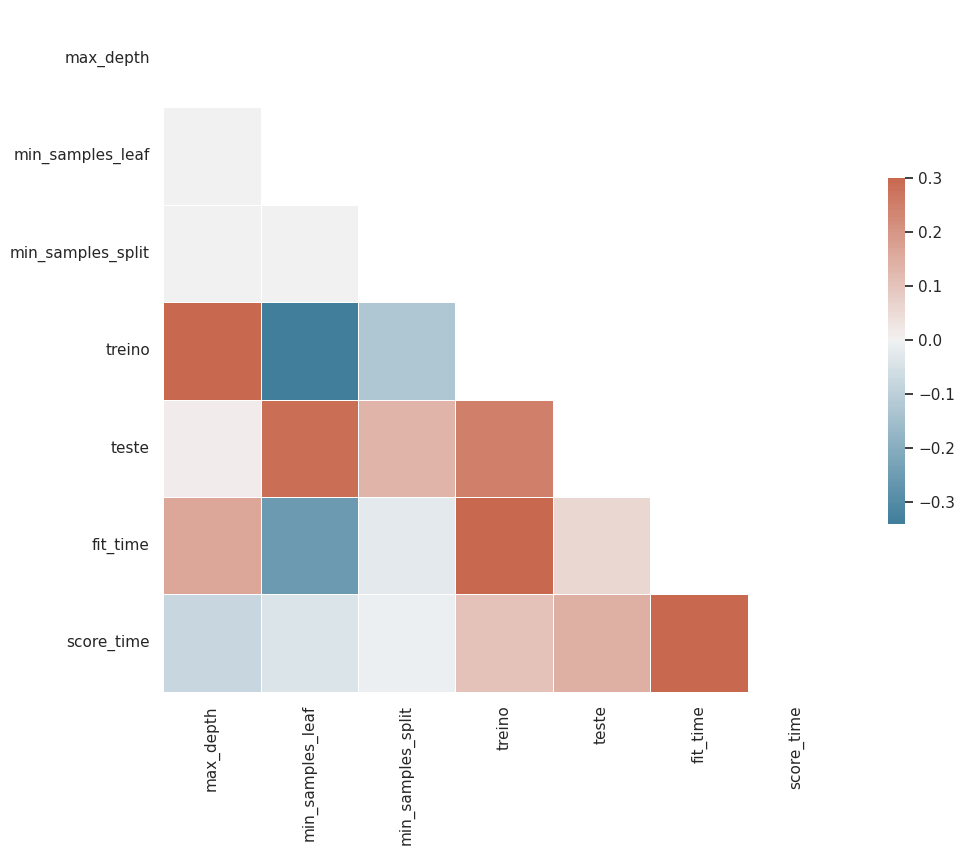

In [33]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,treino,teste,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.026382,0.003907
48,4,32,32,78.750993,78.672633,0.029685,0.008443
34,3,32,128,78.750993,78.672633,0.011458,0.002578
35,3,32,256,78.750993,78.672633,0.011091,0.002302
36,3,64,32,78.750993,78.672633,0.011147,0.002350


# Agora utilizaremos uma ferramenta para busca em grid e cross validation

In [35]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'emtropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv=GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019315,0.003863,0.003881,0.000151,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.020749,0.010943,0.004428,0.000992,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.018290,0.005693,0.004078,0.000672,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.018361,0.003733,0.003777,0.000210,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.016784,0.001456,0.004750,0.001594,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [36]:
print(busca.best_params_)
print(busca.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [37]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

# Agora vamos testar o melhor modelo encontrado. (Cuidado com este procedimento, leia o parágrafo abaixo.)

In [39]:
from sklearn.metrics import accuracy_score

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar)*100
print(f"Acuracia dos dados foi {accuracy:.2f}%")

Acuracia dos dados foi 78.75%


# cuidado quando utiliza cross validation, não devemos fazer diretamente o predict.
Para resolver este problema fazemos uma nova validação cruzada (nested cross validation)

como pandas não suporta nested validation com groupkfold, utilizaremos tudo sem agrupar

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=GroupKFold(n_splits=10), groups=dados.modelo)


ValueError: ignored

In [44]:
from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'emtropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv=KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033734,0.005037,0.007448,0.003303,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.032030,0.002228,0.007927,0.003641,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.031193,0.002091,0.009688,0.003583,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.034967,0.006735,0.011769,0.004205,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.024539,0.008176,0.005840,0.002739,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

array([0.7765, 0.797 , 0.787 , 0.777 , 0.796 ])

In [48]:
def imprime_score(scores):
    media = scores.mean()*100
    desvio_padrao = scores.std()*100
    print(f'Accuracy médio: {media*100:.2f}')
    print(f'Accuracy com dummy stratified, 10 = [{(media-2*desvio_padrao)*100:.2f}, {(media+2*desvio_padrao)*100:.2f}]')

In [49]:
imprime_score(scores=scores)

Accuracy médio: 7867.00
Accuracy com dummy stratified, 10 = [7690.18, 8043.82]


# agora verificamos a melhor configuração

In [53]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


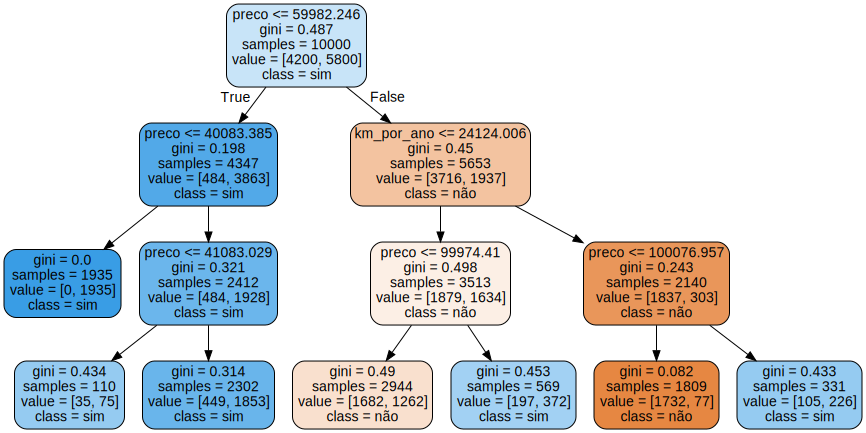

In [54]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph